# Import Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [2]:
dataset = pd.read_csv(r"C:\Users\Admin\Desktop\AI_Financial_Anomaly_Detection\Data\transactions_sample.csv")

In [3]:
dataset.head()

,transaction_id,account_id,vendor_name,transaction_date,amount,currency,transaction_type,department,employee_id
0,4538c175-6cfd-4fa2-aaa2-17f044bc1d5b,9506,"Fox, Jenkins and Vasquez",23-08-2025,5987.23,INR,Maintenance,Sales,50676
1,196993bb-9b5c-446a-83d8-6fe4172da72b,2364,"Hudson, Green and Spencer",17-09-2025,32330.94,INR,Reimbursement,HR,50687
2,0968cf94-9840-4bdc-860c-9b7ab9356a4b,9975,Gordon-Smith,12-07-2025,5810.50,INR,Refund,Finance,11535
3,37826110-d2ab-41d0-bea8-ec2626ec7425,1369,Martinez and Sons,12-07-2025,40576.77,INR,Reimbursement,HR,43747
4,528585fa-39f1-43f5-8e8c-fbdd328c8ead,1028,Greene Inc,19-08-2025,36832.59,INR,Salary,Sales,91348


In [4]:
dataset.tail()

,transaction_id,account_id,vendor_name,transaction_date,amount,currency,transaction_type,department,employee_id
1995,2f4bd97c-d571-468a-8896-fd4ee2da940a,4184,"Garcia, White and Hernandez",13-09-2025,24240.30,INR,Maintenance,HR,69903
1996,c76331cc-860e-4552-acb7-1cf770326c48,4810,Watson and Sons,31-08-2025,45741.14,INR,Refund,Finance,26473
1997,08b8e624-4dc8-4240-b295-676b678fc5c0,9724,Hughes-Wade,16-09-2025,46899.23,INR,Reimbursement,Sales,64266
1998,556c5a99-88a7-4526-9510-7b0a10004523,1479,"Ortega, Wilcox and Phelps",26-07-2025,23252.08,INR,Salary,HR,89048
1999,1c526ad7-d819-4ac2-9a23-dc53f1977929,9950,"Mcgrath, Leonard and Burke",22-05-2025,7002.10,INR,Purchase,HR,11471


In [5]:
dataset.dtypes

transaction_id       object
account_id            int64
vendor_name          object
transaction_date     object
amount              float64
currency             object
transaction_type     object
department           object
employee_id           int64
dtype: object

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    2000 non-null   object 
 1   account_id        2000 non-null   int64  
 2   vendor_name       2000 non-null   object 
 3   transaction_date  2000 non-null   object 
 4   amount            2000 non-null   float64
 5   currency          2000 non-null   object 
 6   transaction_type  2000 non-null   object 
 7   department        2000 non-null   object 
 8   employee_id       2000 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 140.8+ KB


In [7]:
print("Shape:", dataset.shape)

Shape: (2000, 9)


In [8]:
print("Columns:", dataset.columns.tolist())

Columns: ['transaction_id', 'account_id', 'vendor_name', 'transaction_date', 'amount', 'currency', 'transaction_type', 'department', 'employee_id']


In [9]:
print("\nMissing values:\n", dataset.isnull().sum())


Missing values:
 transaction_id      0
account_id          0
vendor_name         0
transaction_date    0
amount              0
currency            0
transaction_type    0
department          0
employee_id         0
dtype: int64


In [54]:
dataset.duplicated().sum()

np.int64(0)

In [10]:
display(dataset.describe())

,account_id,amount,employee_id
count,2000.00000,2000.000000,2000.000000
mean,5495.70500,27710.395585,54650.918500
std,2647.41121,34733.521964,26123.115153
min,1000.00000,125.100000,10174.000000
25%,3133.50000,12570.370000,32168.500000
50%,5484.50000,25398.050000,54219.000000
75%,7804.00000,37906.232500,76456.500000
max,9999.00000,650731.650000,99993.000000


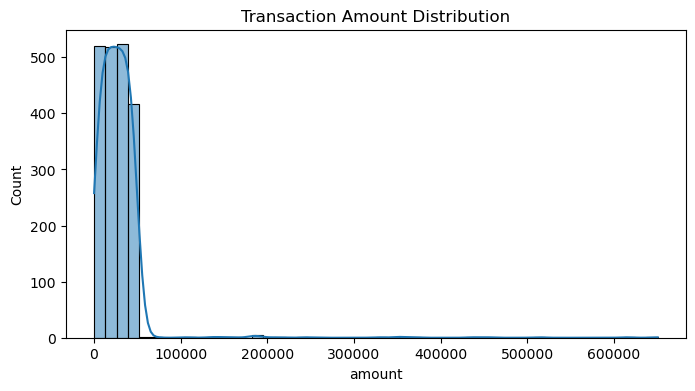

In [11]:
# Amount distribution
plt.figure(figsize=(8,4))
sns.histplot(dataset['amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

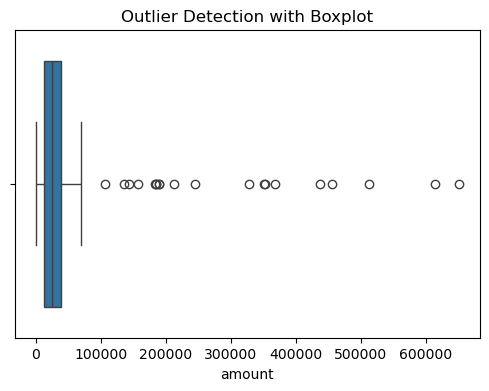

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x=dataset['amount'])
plt.title("Outlier Detection with Boxplot")
plt.show()

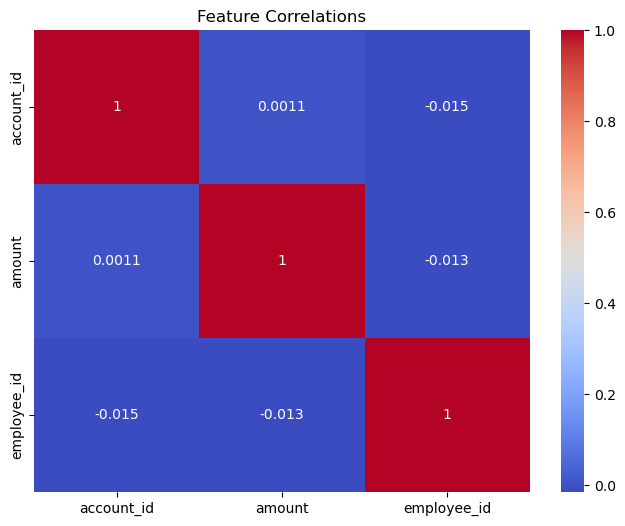

In [20]:
numeric_data = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
sns.heatmap(data=numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_6920\3780638842.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['transaction_date'] = pd.to_datetime(dataset['transaction_date'])


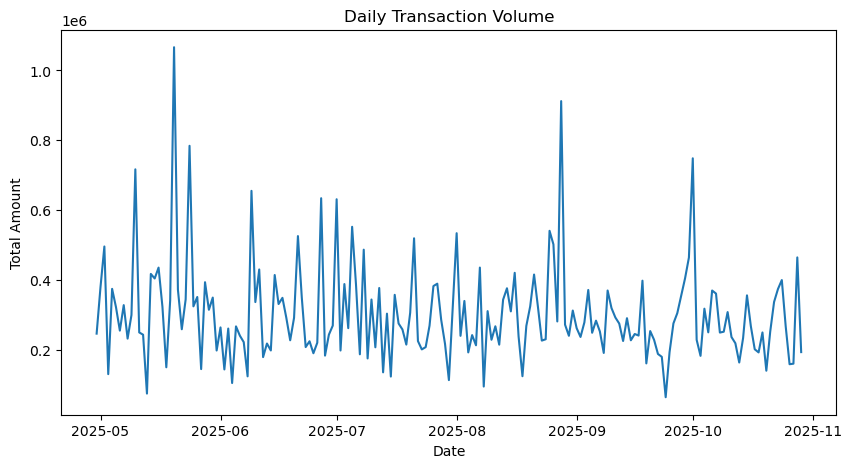

In [22]:
dataset['transaction_date'] = pd.to_datetime(dataset['transaction_date'])
daily_trend = dataset.groupby(dataset['transaction_date'].dt.date)['amount'].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_trend)
plt.title("Daily Transaction Volume")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.show()

In [24]:
dataset.groupby('transaction_type')['amount'].mean().sort_values(ascending=False).head(10)


transaction_type
Maintenance      28576.225787
Purchase         28166.839793
Refund           27755.337449
Reimbursement    27508.979316
Salary           26588.955542
Name: amount, dtype: float64

In [12]:
# Outlier detection (simple)
Q1 = dataset['amount'].quantile(0.25)
Q3 = dataset['amount'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

In [13]:
outliers = dataset[(dataset['amount'] < lower) | (dataset['amount'] > upper)]
print("Outliers detected:", outliers.shape[0])
display(outliers.head())

Outliers detected: 20


,transaction_id,account_id,vendor_name,transaction_date,amount,currency,transaction_type,department,employee_id
112,8b0722af-def2-42e6-9b52-b71bd3c527cc,7266,Coleman Group,24-10-2025,106375.75,INR,Refund,Operations,22612
123,3109c9a4-d782-4eb5-afd3-81e58978823e,1092,"Edwards, Williams and Long",07-10-2025,190158.70,INR,Reimbursement,Finance,50803
197,78a9f567-e93c-4d16-ab8c-bc7634252b3e,8748,Irwin-Walters,20-05-2025,614711.25,INR,Maintenance,HR,87834
264,d762e405-b34b-4159-ae61-25f4f5d3b420,7467,Bass-Stark,28-08-2025,351747.50,INR,Reimbursement,Finance,49593
268,7cb6872d-b88d-4a27-8e06-22d4fdd046c1,7405,Powell-Leon,27-09-2025,143913.30,INR,Salary,IT,96192


In [14]:
# Save cleaned data
clean_data = dataset[(dataset['amount'] >= lower) & (dataset['amount'] <= upper)]
clean_data.to_csv(r"C:\Users\Admin\Desktop\AI_Financial_Anomaly_Detection\Data\clean_financial_data.csv", index=False)
print("Cleaned data saved successfully.")

Cleaned data saved successfully.


# Data Preprocessing & Feature Engineering

# Importing Libraries

In [25]:
from sklearn.preprocessing import StandardScaler

In [28]:
# Convert date columns to datetime format
dataset['transaction_date'] = pd.to_datetime(dataset['transaction_date'])

# Convert categorical variables to category dtype
categorical_cols = ['currency', 'transaction_type', 'department']
for col in categorical_cols:
    dataset[col] = dataset[col].astype('category')

print("Data types updated successfully.")


Data types updated successfully.


In [29]:
# Create time-based features
dataset['year'] = dataset['transaction_date'].dt.year
dataset['month'] = dataset['transaction_date'].dt.month
dataset['day_of_week'] = dataset['transaction_date'].dt.day_name()
dataset['is_weekend'] = dataset['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Transaction value categorization
dataset['amount_category'] = pd.cut(
    dataset['amount'],
    bins=[0, 1000, 10000, 25000, 50000, np.inf],
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

print("Feature Engineering completed successfully.")


Feature Engineering completed successfully.


In [32]:
scaler = StandardScaler()
dataset['amount_scaled'] = scaler.fit_transform(dataset[['amount']])
print(" Feature scaling done on 'amount'.")

 Feature scaling done on 'amount'.


In [35]:
dataset.to_csv(r"C:\Users\Admin\Desktop\AI_Financial_Anomaly_Detection\Data\transactions_cleaned.csv", index=False)
print("Cleaned and processed dataset saved to: data/transactions_cleaned.csv")


Cleaned and processed dataset saved to: data/transactions_cleaned.csv


In [37]:
print("Final Shape:", dataset.shape)
print("\nSample Data:\n")
dataset.head(10)

Final Shape: (2000, 15)

Sample Data:



,transaction_id,account_id,vendor_name,transaction_date,amount,currency,transaction_type,department,employee_id,year,month,day_of_week,is_weekend,amount_category,amount_scaled
0,4538c175-6cfd-4fa2-aaa2-17f044bc1d5b,9506,"Fox, Jenkins and Vasquez",2025-08-23,5987.23,INR,Maintenance,Sales,50676,2025,8,Saturday,1,Low,-0.625580
1,196993bb-9b5c-446a-83d8-6fe4172da72b,2364,"Hudson, Green and Spencer",2025-09-17,32330.94,INR,Reimbursement,HR,50687,2025,9,Wednesday,0,High,0.133062
2,0968cf94-9840-4bdc-860c-9b7ab9356a4b,9975,Gordon-Smith,2025-07-12,5810.50,INR,Refund,Finance,11535,2025,7,Saturday,1,Low,-0.630669
3,37826110-d2ab-41d0-bea8-ec2626ec7425,1369,Martinez and Sons,2025-07-12,40576.77,INR,Reimbursement,HR,43747,2025,7,Saturday,1,High,0.370524
4,528585fa-39f1-43f5-8e8c-fbdd328c8ead,1028,Greene Inc,2025-08-19,36832.59,INR,Salary,Sales,91348,2025,8,Tuesday,0,High,0.262699
5,7bb60745-dc7e-4ffc-a368-42f6c16a2961,3682,Mcgee and Sons,2025-09-09,14497.24,INR,Salary,IT,90737,2025,9,Tuesday,0,Medium,-0.380510
6,8ad7eeee-1ab5-43dc-a04b-acdb1f9e6aab,9224,Gonzalez LLC,2025-10-20,1923.56,INR,Salary,Finance,79074,2025,10,Monday,0,Low,-0.742605
7,aa45a3ba-4d9d-4d98-8afd-1e3bf4787c7e,9307,Mccoy and Sons,2025-06-18,16699.96,INR,Maintenance,IT,66524,2025,6,Wednesday,0,Medium,-0.317077
8,d8ebc0fc-922b-4b92-ab04-722cbbe2de9b,3369,Stevens Inc,2025-04-30,45025.16,INR,Maintenance,IT,29631,2025,4,Wednesday,0,High,0.498628
9,0d6e7393-34f1-4574-997f-b6703d0b5651,2718,"Thompson, Anderson and Jenkins",2025-08-11,47283.94,INR,Maintenance,Sales,17754,2025,8,Monday,0,High,0.563676


# Model Building

# Importing Libraries

In [39]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [41]:
# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\AI_Financial_Anomaly_Detection\Data\transactions_cleaned.csv")

print("Data loaded successfully for anomaly detection!")
print("Shape:", df.shape)
df.head()

Data loaded successfully for anomaly detection!
Shape: (2000, 15)


,transaction_id,account_id,vendor_name,transaction_date,amount,currency,transaction_type,department,employee_id,year,month,day_of_week,is_weekend,amount_category,amount_scaled
0,4538c175-6cfd-4fa2-aaa2-17f044bc1d5b,9506,"Fox, Jenkins and Vasquez",2025-08-23,5987.23,INR,Maintenance,Sales,50676,2025,8,Saturday,1,Low,-0.625580
1,196993bb-9b5c-446a-83d8-6fe4172da72b,2364,"Hudson, Green and Spencer",2025-09-17,32330.94,INR,Reimbursement,HR,50687,2025,9,Wednesday,0,High,0.133062
2,0968cf94-9840-4bdc-860c-9b7ab9356a4b,9975,Gordon-Smith,2025-07-12,5810.50,INR,Refund,Finance,11535,2025,7,Saturday,1,Low,-0.630669
3,37826110-d2ab-41d0-bea8-ec2626ec7425,1369,Martinez and Sons,2025-07-12,40576.77,INR,Reimbursement,HR,43747,2025,7,Saturday,1,High,0.370524
4,528585fa-39f1-43f5-8e8c-fbdd328c8ead,1028,Greene Inc,2025-08-19,36832.59,INR,Salary,Sales,91348,2025,8,Tuesday,0,High,0.262699


In [42]:
features = ['amount_scaled'] 
dataset_model = dataset[features].copy()

In [43]:
iso = IsolationForest(
    contamination=0.02,     
    random_state=42
)
dataset['iso_score'] = iso.fit_predict(dataset_model)
dataset['iso_anomaly'] = dataset['iso_score'].apply(lambda x: 1 if x == -1 else 0)
print("Isolation Forest model applied.")


Isolation Forest model applied.


In [44]:
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.02
)
dataset['lof_score'] = lof.fit_predict(dataset_model)
dataset['lof_anomaly'] = dataset['lof_score'].apply(lambda x: 1 if x == -1 else 0)
print("Local Outlier Factor model applied.")


Local Outlier Factor model applied.


In [45]:
dataset['final_anomaly'] = np.where(
    (dataset['iso_anomaly'] == 1) | (dataset['lof_anomaly'] == 1),
    1, 0
)
print("Combined anomaly labels created.")


Combined anomaly labels created.


In [46]:
dataset.to_csv(r"C:\Users\Admin\Desktop\AI_Financial_Anomaly_Detection\Data\transactions_with_anomalies.csv", index=False)
print("Anomaly detection results saved to data/transactions_with_anomalies.csv")


Anomaly detection results saved to data/transactions_with_anomalies.csv


In [47]:
total_anomalies = dataset['final_anomaly'].sum()
percentage = round((total_anomalies / dataset.shape[0]) * 100, 2)
print(f"Total Anomalous Transactions: {total_anomalies} ({percentage}%)")

dataset[dataset['final_anomaly'] == 1].head()

Total Anomalous Transactions: 50 (2.5%)


,transaction_id,account_id,vendor_name,transaction_date,amount,currency,transaction_type,department,employee_id,year,month,day_of_week,is_weekend,amount_category,amount_scaled,iso_score,iso_anomaly,lof_score,lof_anomaly,final_anomaly
18,49c55bfa-4852-42e9-991d-912b5be47010,5553,"Chavez, Dean and Waller",2025-07-30,17927.88,INR,Purchase,Sales,38781,2025,7,Wednesday,0,Medium,-0.281715,1,0,-1,1,1
81,80d3b7c7-843b-498d-bc55-5c2b7d7b2166,4839,Jimenez Group,2025-07-19,401.13,INR,Reimbursement,Finance,18112,2025,7,Saturday,1,Very Low,-0.786448,-1,1,1,0,1
104,cb896aea-aedc-4921-abae-c6393d237d6e,6916,Thompson-Rivera,2025-07-15,444.09,INR,Purchase,HR,45915,2025,7,Tuesday,0,Very Low,-0.785210,-1,1,1,0,1
112,8b0722af-def2-42e6-9b52-b71bd3c527cc,7266,Coleman Group,2025-10-24,106375.75,INR,Refund,Operations,22612,2025,10,Friday,0,Very High,2.265392,-1,1,-1,1,1
123,3109c9a4-d782-4eb5-afd3-81e58978823e,1092,"Edwards, Williams and Long",2025-10-07,190158.70,INR,Reimbursement,Finance,50803,2025,10,Tuesday,0,Very High,4.678159,-1,1,-1,1,1


# Visualization of Anomalies

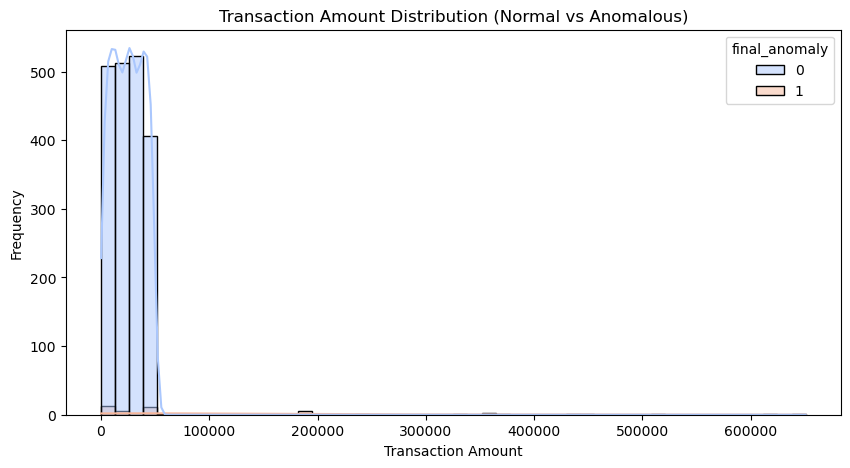

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(data=dataset, x='amount', hue='final_anomaly', bins=50, kde=True, palette='coolwarm')
plt.title("Transaction Amount Distribution (Normal vs Anomalous)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

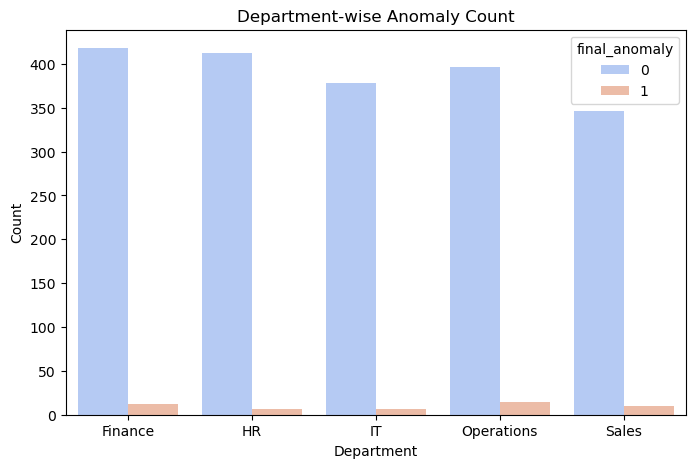

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(data=dataset, x='department', hue='final_anomaly', palette='coolwarm')
plt.title("Department-wise Anomaly Count")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

<Figure size 1200x600 with 0 Axes>

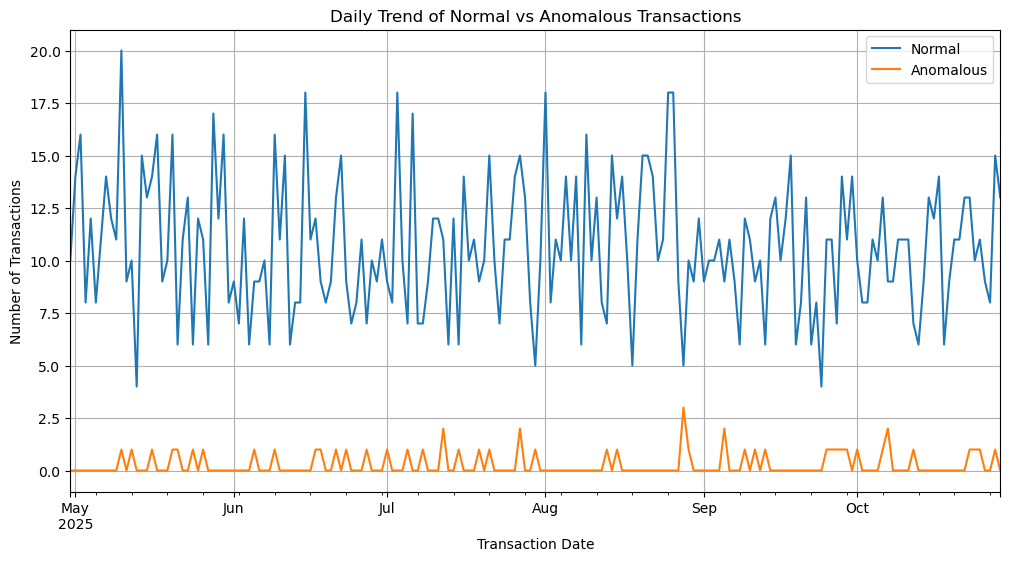

In [52]:
dataset['transaction_date'] = pd.to_datetime(dataset['transaction_date'])
daily_counts = dataset.groupby(['transaction_date', 'final_anomaly']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
daily_counts.plot(kind='line', figsize=(12,6))
plt.title("Daily Trend of Normal vs Anomalous Transactions")
plt.xlabel("Transaction Date")
plt.ylabel("Number of Transactions")
plt.legend(["Normal", "Anomalous"])
plt.grid(True)
plt.show()


In [53]:
anomaly_examples = dataset[dataset['final_anomaly'] == 1][['transaction_id', 'vendor_name', 'amount', 'department', 'transaction_date']]
print("Sample of Detected Anomalies:")
anomaly_examples.head(10)


Sample of Detected Anomalies:


,transaction_id,vendor_name,amount,department,transaction_date
18,49c55bfa-4852-42e9-991d-912b5be47010,"Chavez, Dean and Waller",17927.88,Sales,2025-07-30
81,80d3b7c7-843b-498d-bc55-5c2b7d7b2166,Jimenez Group,401.13,Finance,2025-07-19
104,cb896aea-aedc-4921-abae-c6393d237d6e,Thompson-Rivera,444.09,HR,2025-07-15
112,8b0722af-def2-42e6-9b52-b71bd3c527cc,Coleman Group,106375.75,Operations,2025-10-24
123,3109c9a4-d782-4eb5-afd3-81e58978823e,"Edwards, Williams and Long",190158.70,Finance,2025-10-07
174,32ade72d-8b43-4e1a-9406-13300ea56439,Rodgers and Sons,486.50,IT,2025-08-15
197,78a9f567-e93c-4d16-ab8c-bc7634252b3e,Irwin-Walters,614711.25,HR,2025-05-20
253,e3d3ad2f-ca2f-468a-b06a-78e80f552f02,"King, Church and Burke",49686.83,IT,2025-10-12
264,d762e405-b34b-4159-ae61-25f4f5d3b420,Bass-Stark,351747.50,Finance,2025-08-28
268,7cb6872d-b88d-4a27-8e06-22d4fdd046c1,Powell-Leon,143913.30,IT,2025-09-27


# Model Evaluation & Explainability

# Importing Libraries

In [61]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
import shap
import joblib
import os
from datetime import datetime

In [58]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\AI_Financial_Anomaly_Detection\Data\transactions_with_anomalies.csv", parse_dates=['transaction_date'])
print("Loaded:", df.shape)
display(df.head())

Loaded: (2000, 20)


,transaction_id,account_id,vendor_name,transaction_date,amount,currency,transaction_type,department,employee_id,year,month,day_of_week,is_weekend,amount_category,amount_scaled,iso_score,iso_anomaly,lof_score,lof_anomaly,final_anomaly
0,4538c175-6cfd-4fa2-aaa2-17f044bc1d5b,9506,"Fox, Jenkins and Vasquez",2025-08-23,5987.23,INR,Maintenance,Sales,50676,2025,8,Saturday,1,Low,-0.625580,1,0,1,0,0
1,196993bb-9b5c-446a-83d8-6fe4172da72b,2364,"Hudson, Green and Spencer",2025-09-17,32330.94,INR,Reimbursement,HR,50687,2025,9,Wednesday,0,High,0.133062,1,0,1,0,0
2,0968cf94-9840-4bdc-860c-9b7ab9356a4b,9975,Gordon-Smith,2025-07-12,5810.50,INR,Refund,Finance,11535,2025,7,Saturday,1,Low,-0.630669,1,0,1,0,0
3,37826110-d2ab-41d0-bea8-ec2626ec7425,1369,Martinez and Sons,2025-07-12,40576.77,INR,Reimbursement,HR,43747,2025,7,Saturday,1,High,0.370524,1,0,1,0,0
4,528585fa-39f1-43f5-8e8c-fbdd328c8ead,1028,Greene Inc,2025-08-19,36832.59,INR,Salary,Sales,91348,2025,8,Tuesday,0,High,0.262699,1,0,1,0,0


In [59]:
candidate_features = []
for col in ['amount_scaled', 'vendor_freq', 'vendor_mean', 'vendor_std', 'pct_vs_vendor_mean']:
    if col in df.columns:
        candidate_features.append(col)

if not candidate_features:
    if 'amount' in df.columns:
        df['amount_scaled'] = (df['amount'] - df['amount'].mean()) / (df['amount'].std() + 1e-9)
        candidate_features = ['amount_scaled']

print("Features used:", candidate_features)

X = df[candidate_features].fillna(0)

Features used: ['amount_scaled']


In [63]:
iso = IsolationForest(n_estimators=200, contamination=0.02, random_state=42)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02, novelty=False) 

In [64]:
iso.fit(X)
iso_scores_raw = iso.decision_function(X) 
df['iso_score_raw'] = iso_scores_raw

df['iso_anomaly_score'] = -df['iso_score_raw']


iso_threshold = np.percentile(df['iso_anomaly_score'], 98)
df['iso_pred'] = (df['iso_anomaly_score'] >= iso_threshold).astype(int)

lof_pred = lof.fit_predict(X)
df['lof_pred'] = np.where(lof_pred == -1, 1, 0)

if hasattr(lof, "negative_outlier_factor_"):
    df['lof_score_proxy'] = -lof.negative_outlier_factor_  


df['combined_pred'] = np.where((df['iso_pred'] == 1) | (df['lof_pred'] == 1), 1, 0)

print("Model labels added. Counts:")
print("ISO flagged:", int(df['iso_pred'].sum()), "LOF flagged:", int(df['lof_pred'].sum()), "Combined:", int(df['combined_pred'].sum()))

Model labels added. Counts:
ISO flagged: 40 LOF flagged: 40 Combined: 50


In [65]:
label_col = None
for cand in ['is_flagged', 'final_anomaly', 'label', 'true_anomaly']:
    if cand in df.columns:
        label_col = cand
        break

if label_col is not None:
    print("Found true label column:", label_col)
    y_true = df[label_col].astype(int)
    
    def metrics(y_true, y_pred):
        return {
            'precision': precision_score(y_true, y_pred, zero_division=0),
            'recall': recall_score(y_true, y_pred, zero_division=0),
            'f1': f1_score(y_true, y_pred, zero_division=0),
            'support': int(y_true.sum())
        }
    print("IsolationForest metrics:", metrics(y_true, df['iso_pred']))
    print("LOF metrics:", metrics(y_true, df['lof_pred']))
    print("Combined metrics:", metrics(y_true, df['combined_pred']))
else:
    
    print("No true label found. Using proxy evaluations.")
    
    amount_threshold = df['amount'].mean() + 5 * df['amount'].std() if 'amount' in df.columns else df['amount_scaled'].mean() + 5 * df['amount_scaled'].std()
    df['pseudo_gt'] = 0
    if 'amount' in df.columns:
        df.loc[df['amount'] > amount_threshold, 'pseudo_gt'] = 1
    else:
        df.loc[df['amount_scaled'] > amount_threshold, 'pseudo_gt'] = 1
    pseudo_count = int(df['pseudo_gt'].sum())
    print(f"Pseudo ground-truth anomalies by amount-threshold (> mean+5σ): {pseudo_count}")

    
    def precision_at_k(pred_scores, k, true_mask):
        
        k = min(len(pred_scores), k)
        topk_idx = np.argsort(-pred_scores)[:k]
        return true_mask.iloc[topk_idx].sum() / k

    
    p_at_50_iso = precision_at_k(df['iso_anomaly_score'], 50, df['pseudo_gt'])
    p_at_50_comb = precision_at_k(df['combined_pred'], 50, df['pseudo_gt'])
    print(f"Precision@50 (ISO score): {p_at_50_iso:.3f}")
    print(f"Precision@50 (Combined binary): {p_at_50_comb:.3f}")

   
    intersection = ((df['iso_pred']==1) & (df['lof_pred']==1)).sum()
    union = ((df['iso_pred']==1) | (df['lof_pred']==1)).sum()
    jaccard = intersection / union if union>0 else 0.0
    print(f"Model agreement (Jaccard) between ISO & LOF: {jaccard:.3f}")


Found true label column: final_anomaly
IsolationForest metrics: {'precision': 1.0, 'recall': 0.8, 'f1': 0.8888888888888888, 'support': 50}
LOF metrics: {'precision': 1.0, 'recall': 0.8, 'f1': 0.8888888888888888, 'support': 50}
Combined metrics: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'support': 50}


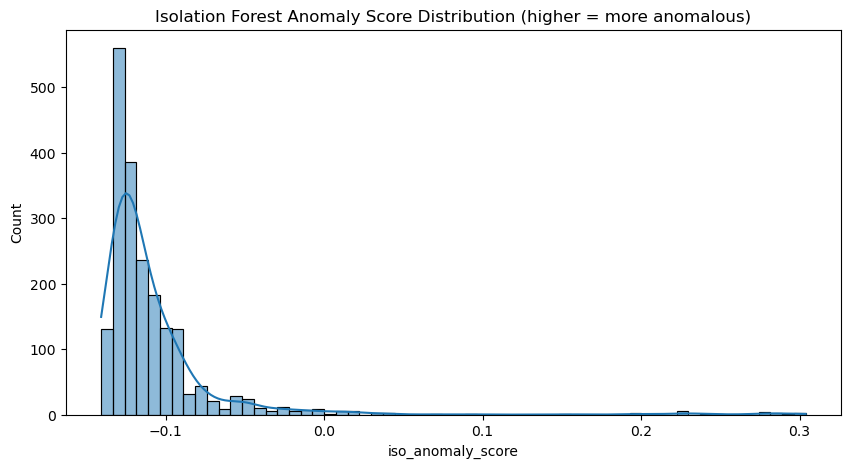

In [67]:
plt.figure(figsize=(10,5))
sns.histplot(df['iso_anomaly_score'], bins=60, kde=True)
plt.title("Isolation Forest Anomaly Score Distribution (higher = more anomalous)")
plt.show()


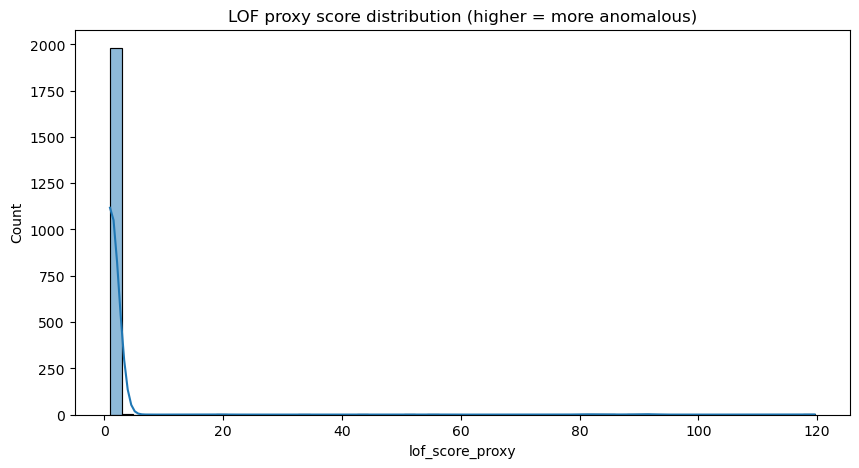

In [68]:
if 'lof_score_proxy' in df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df['lof_score_proxy'], bins=60, kde=True)
    plt.title("LOF proxy score distribution (higher = more anomalous)")
    plt.show()

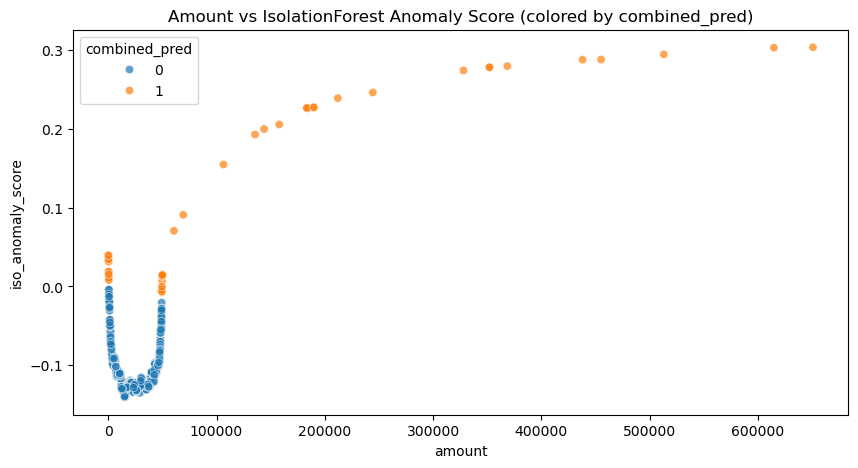

In [69]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='amount', y='iso_anomaly_score', hue='combined_pred', alpha=0.7)
plt.yscale('symlog') if (df['iso_anomaly_score'].abs().max() > 100) else None
plt.title("Amount vs IsolationForest Anomaly Score (colored by combined_pred)")
plt.show()

In [75]:
iso.fit(X)
df['iso_score_raw'] = iso.decision_function(X)
df['iso_anomaly_score'] = -df['iso_score_raw']

iso_threshold = np.percentile(df['iso_anomaly_score'], 98)
df['iso_pred'] = (df['iso_anomaly_score'] >= iso_threshold).astype(int)


X_sample = shap.sample(X, 100) 
explainer = shap.KernelExplainer(iso.decision_function, X_sample)
shap_values = explainer.shap_values(X.values)


feature_names = X.columns.tolist()
shap_df = pd.DataFrame(shap_values, columns=feature_names)


top1 = shap_df.abs().idxmax(axis=1)
top1_val = shap_df.to_numpy()[np.arange(len(shap_df)), shap_df.columns.get_indexer(top1)]


explain_table = pd.DataFrame({
    'transaction_id': df['transaction_id'] if 'transaction_id' in df.columns else df.index.astype(str),
    'iso_anomaly_score': df['iso_anomaly_score'],
    'top_feature': top1,
    'top_shap_value': top1_val
})


os.makedirs(r"C:\Users\Admin\Desktop\AI_Financial_Anomaly_Detection\Data\explanations", exist_ok=True)
explain_table.to_csv(r"C:\Users\Admin\Desktop\AI_Financial_Anomaly_Detection\Data/iso_shap_top1.csv", index=False)
print("SHAP top-1 explanations saved to C:/Users/Admin/Desktop/AI_Financial_Anomaly_Detection/Data/iso_shap_top1.csv")

  0%|          | 0/2000 [00:00<?, ?it/s]

SHAP top-1 explanations saved to C:/Users/Admin/Desktop/AI_Financial_Anomaly_Detection/Data/iso_shap_top1.csv


In [76]:
models_dir = "models"
os.makedirs(models_dir, exist_ok=True)
iso_path = os.path.join(models_dir, f"isolation_forest_{datetime.now().strftime('%Y%m%d_%H%M%S')}.joblib")
joblib.dump(iso, iso_path)
print("Saved IsolationForest model to:", iso_path)


out_path = r"C:\Users\Admin\Desktop\AI_Financial_Anomaly_Detection\Data\transactions_eval.csv"
df.to_csv(out_path, index=False)
print("Saved transactions with model outputs to:", out_path)

Saved IsolationForest model to: models\isolation_forest_20251031_220019.joblib
Saved transactions with model outputs to: C:\Users\Admin\Desktop\AI_Financial_Anomaly_Detection\Data\transactions_eval.csv


In [77]:
total = df.shape[0]
flagged = int(df['combined_pred'].sum())
print(f"\nQuick summary: {flagged} transactions flagged out of {total} ({flagged/total*100:.3f}%)")

if label_col:
    print("Evaluation used true labels; check classification metrics above.")
else:
    print("No true labels available — used pseudo-evaluation. Consider collecting human validations for best metrics.")


Quick summary: 50 transactions flagged out of 2000 (2.500%)
Evaluation used true labels; check classification metrics above.
